# 2020年12月4日

Notes & Questions for CCTPY v0.1

B. Qin

## ---  Codes 杂项 ---

### 1. 运行环境要求

<div style="border:dotted grey;line-height:2em">
编写 cctpy 时，所用 python 版本和库：<br/>
python 3.8.0<br/>
numpy 1.16.6<br/>
matlib 3.3.3<br/>
</div>

## 2. Can't plot beamline \[demo codes in user manual\]

--> Solved: 

Add Plot2.show() @ Code END!

<div style="border:dotted grey;line-height:2em">
手册中绘图相关代码，需要在最后补上 Plot2.show() 或 Plot3.show()，分别绘制二维和三维图象
</div>

## 3. 无法分别显示2张或以上plot

<div style="border:dotted grey;line-height:2em">
cctpy 中的 Plot2/Plot3 只支持一次运行绘制一张图片，需要同时绘制多个图象时，需要自己编写 matpltlib 代码，下面给个出两个例子。
</div>

track 12 particles
▇▇▇▇▇▇▇▇▇▇▇▇ finish
track 12 particles
▇▇▇▇▇▇▇▇▇▇▇▇ finish


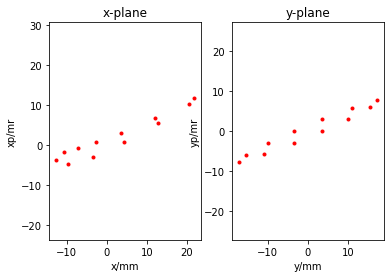

In [1]:
# 绘制 x 和 y 方向相椭圆
from cctpy import Beamline,P2,MM,BaseUtils
import matplotlib.pyplot as plt

bl = ( # QS 磁铁加前后 1m 漂移段
    Beamline.set_start_point(P2.origin())
      .first_drift(direct=P2.x_direct(),length=1.0)
      .append_qs(
          length=0.27,gradient=0,
          second_gradient=-1000,aperture_radius=60*MM
      ).append_drift(1.0)
)

x,y = bl.track_phase_ellipse(
    x_sigma_mm=3.5,xp_sigma_mrad=7.5,
    y_sigma_mm=3.5,yp_sigma_mrad=7.5,
    delta=0.0,kinetic_MeV=250,
    particle_number=12,footstep=5*MM
)

plt.subplot(121)
plt.plot(*P2.extract(x),'r.')
plt.xlabel(xlabel='x/mm')
plt.ylabel(ylabel='xp/mr')
plt.title(label='x-plane')
plt.axis("equal")

plt.subplot(122)
plt.plot(*P2.extract(y),'r.')
plt.xlabel(xlabel='y/mm')
plt.ylabel(ylabel='yp/mr')
plt.title(label='y-plane')
plt.axis("equal")

plt.show()

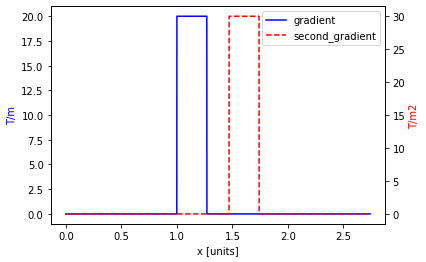

In [2]:
# 绘制双 y 轴图象
from cctpy import Beamline,P2,MM,BaseUtils
import matplotlib.pyplot as plt

bl = ( # 前后 1m 漂移段，中间一个四级铁一个六极铁
    Beamline.set_start_point(P2.origin())
      .first_drift(direct=P2.x_direct(),length=1.0)
      .append_qs(
          length=0.27,gradient=20,
          second_gradient=0,aperture_radius=60*MM
      ).append_drift(0.2)
      .append_qs(
          length=0.27,gradient=0,
          second_gradient=60,aperture_radius=60*MM
      ).append_drift(1.0)
)

gradient = bl.graident_field_along()
second_gradient = bl.second_graident_field_along()

fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(*P2.extract(gradient), 'b-', label = 'gradient')
ax2 = ax.twinx()
ax2.plot(*P2.extract(second_gradient), 'r--', label = 'second_gradient')

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
ax.set_xlabel("x [units]")
ax.set_ylabel("T/m",color='b')
ax2.set_ylabel("T/m2",color='r')

plt.show()

## 4. Plot无axis & unit

<div style="border:dotted grey;line-height:2em">
Plot2.info() 可以对标记 lable 和 title
<br>
另外新增了 Plot2.legend() 可以显示图例
</div>

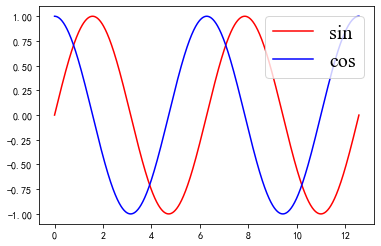

In [3]:
# Plot2.legend()
from cctpy import Plot2
import numpy as np

x = np.linspace(0,4*np.pi,1000)
y1 = np.sin(x)
y2 = np.cos(x)

Plot2.plot_xy_array(x,y1,describe='r-')
Plot2.plot_xy_array(x,y2,describe='b-')

Plot2.legend('sin','cos',font_size=20)

## 5. 磁场计算或束流跟踪耗时相对长，可增加简易进度条；以及时间花费统计。

<div style="border:dotted grey;line-height:2em">
Beamline.track_phase_ellipse() 函数已添加进度条
<br>
见 <u>3. 无法分别显示2张或以上plot</u> 中示例 1
</div>

# Codes 主要问题

## 1. 单个文件太长，找代码不方便；考虑至少分为2个文件？

(1) basic utilities;

(2) magnet calculation, beamline assemble, particle tracking
